We will consider the credit card fraud dataset from Kaggle for understanding Logistic Regression

https://www.kaggle.com/mlg-ulb/creditcardfraud

x1, x2, x3, x4 are 4 input features

we want 2 principal components

pca1 = a* x1 + b* x2 +c* x3 + d* x4

pca2 = s1* x1 + s2* x2 + s3* x3 + s4* x4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
print(df.shape)

(284807, 31)


In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
dd1 = df['Class'].value_counts()
print(type(dd1))
print(dd1)

<class 'pandas.core.series.Series'>
Class
0    284315
1       492
Name: count, dtype: int64


In [13]:
no_fraud = df['Class'].value_counts()[0]
fraud = df['Class'].value_counts()[1]

print(type(no_fraud))
print(type(fraud))

print(no_fraud)
print(fraud)

per_no_fraud = round(no_fraud/len(df)*100, 2)
per_fraud = round(fraud/len(df)*100, 2)

print(per_no_fraud)
print(per_fraud)

<class 'numpy.int64'>
<class 'numpy.int64'>
284315
492
99.83
0.17


<Axes: xlabel='Class', ylabel='count'>

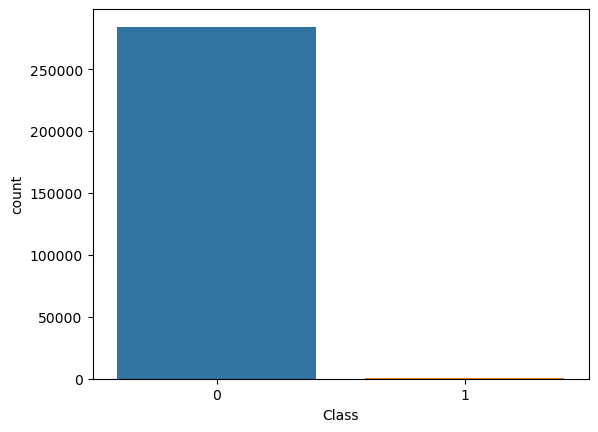

In [14]:
# Let's plot the classes

sns.countplot(x='Class', data=df)

### Note

From the above graph, notice that the classes are imbalanced. 

C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


++++++++
[0.0, 25691.16]


C:\Users\localuser\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


after sns


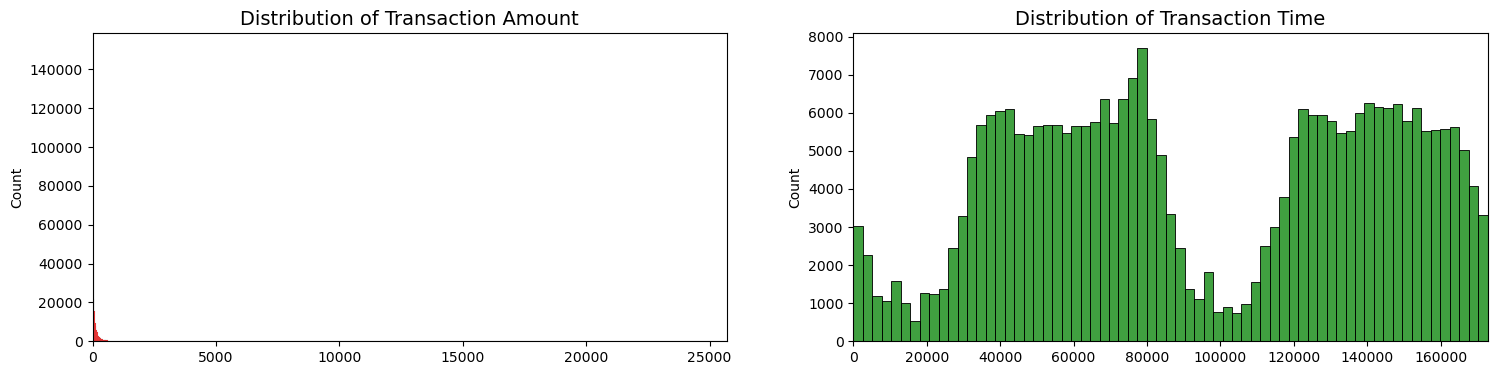

In [15]:
# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=1000)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
print("after sns")



# Let's plot distribution of Amount and Time columns separately

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', bins=1000)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)-25000])
print("++++++++")
print([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
print("after sns")



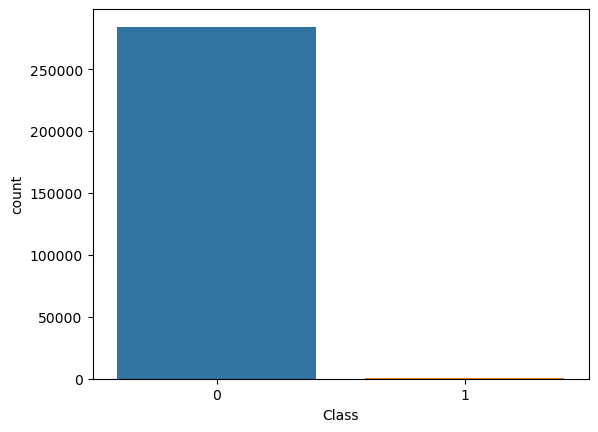

In [16]:
sns.countplot(x="Class", data=df)
plt.show()

Correlation Matrix

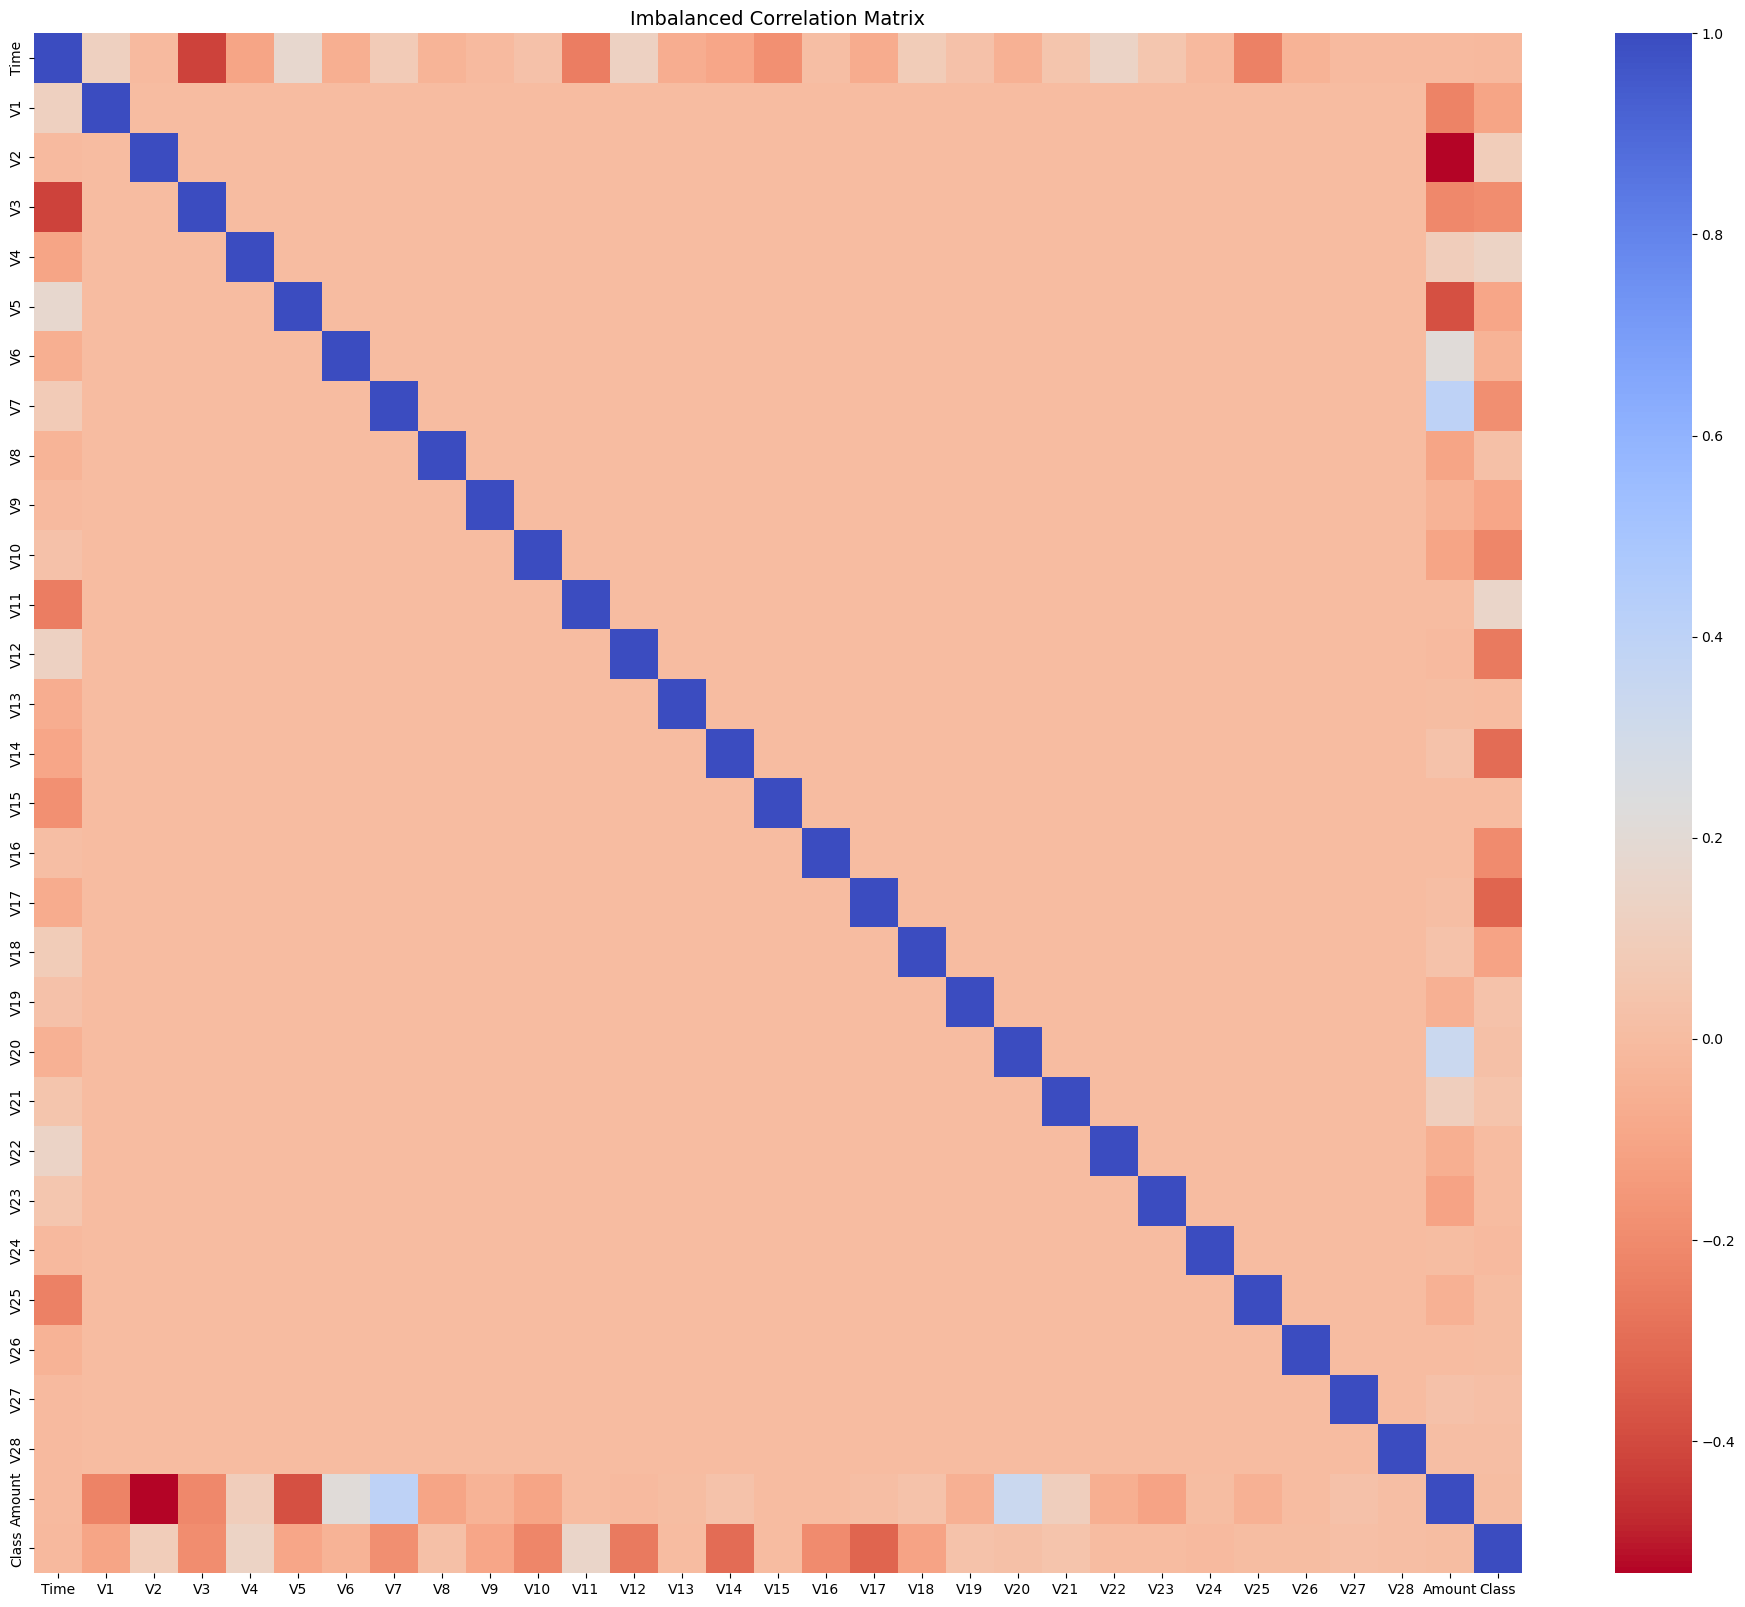

In [17]:
f, ax1= plt.subplots(1,1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


plt.show()

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [19]:
# x will contain all columns except the target column which is "Class and "Time"
x = df.drop(['Class', 'Time'], axis=1)
y = df['Class']


In [21]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
x2 = x.copy(deep=True)
y2 = y.copy(deep=True)

In [23]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
print(type(x_train))

print(type(x_test))

print(type(y_train))

print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [26]:
# we are creating an instance of StandardScaler class and then performing a fit on x_train to obtain 
# mean and standard deviation for x-train
# then use it to transorm both x_train and x_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train) # mean and standard deviation for x-train

train_sc = scaler.transform(x_train) 

test_sc = scaler.transform(x_test)

In [27]:
print(type(train_sc))

print(type(test_sc))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# creating an instance

model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

In [30]:
model.fit(train_sc, y_train)

LogisticRegression(C=1)

In [31]:
print(test_sc.shape)

(56962, 29)


In [32]:
ypred = model.predict(test_sc)

In [33]:
# to get coefficients and intercepts use the following command
print(model.coef_, model.intercept_)

[[ 0.21000645 -0.02703003  0.05114924  0.94489153  0.12249154 -0.1317554
  -0.18492592 -0.22054233 -0.26720015 -0.7383227  -0.03200861 -0.00188286
  -0.24659175 -0.58457715 -0.06417357 -0.18679182 -0.00209983 -0.03586141
   0.0296969  -0.33802751  0.25946191  0.45133438 -0.07118987  0.06502711
  -0.03170071 -0.01512444 -0.34162024 -0.14286101  0.23955579]] [-8.61462961]


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[56855,     9],
       [   41,    57]], dtype=int64)

We used test_sc this is scaled x_test, we get ypred, which has the predicted value

For test_sc we already know the true value, which is y_test

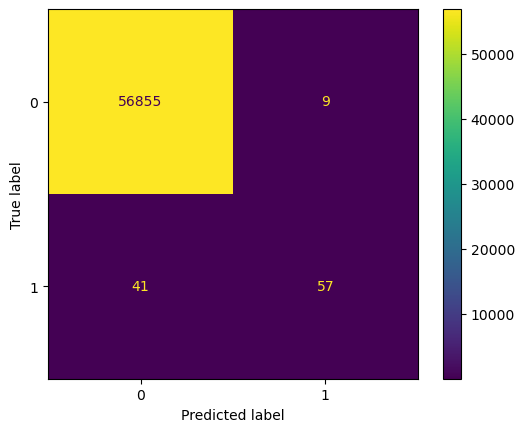

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, ypred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [36]:
from sklearn.metrics import accuracy_score
print("Base rate accuracy is: %0.2f" %(accuracy_score(y_test, ypred)))

Base rate accuracy is: 1.00


In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [38]:
logit_roc_auc = roc_auc_score(y_test, ypred)
print("Logistic AUC = %0.2f" %logit_roc_auc)
print(classification_report(y_test, ypred))

Logistic AUC = 0.79
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
from sklearn.metrics import roc_curve
print(test_sc.shape)
print(y_test[0:5])
b = model.predict_proba(test_sc)[:,1]
print(b[0:5])
fpr, tpr, threshold = roc_curve(y_test, b)

(56962, 29)
43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64
[9.99999985e-01 6.88150968e-05 4.89839335e-05 8.23636177e-04
 1.33827328e-04]


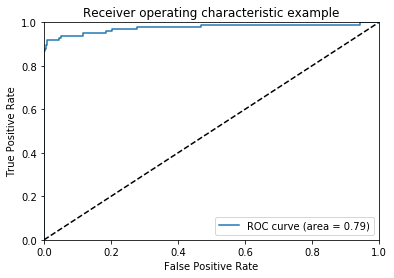

In [36]:
# plotting ROC curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Generating synthetic data is more applicable

image recognition/classification - 

lung x-rays 

500 pneumonia 

1000 no pneumonia


to balance

500 pneumonia images and we can do image augmentation, generate 500 more pneumonia images

1000 pneumonia and 1000 no pneumonia

upsampling

Another way is 

500 pneumonia images

out of 1000 no pneumonia images, we randomly pick 500 no pneumonia images

500 pneumonia and 500 no pneumonia, this is known as balancing

downsampling

In [41]:
x_new = x2[0:2]
print(x_new)
y_new = y2[0:2]
print(y_new)

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   

        V24       V25       V26       V27       V28  Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69  

[2 rows x 29 columns]
0    0
1    0
Name: Class, dtype: int64


In [42]:
x_new_scaled = scaler.transform(x_new)
print(x_new_scaled)

[[-0.69483733 -0.04370221  1.67527011  0.9744065  -0.24452409  0.34634989
   0.19180615  0.08335681  0.33057745  0.08470396 -0.5407511  -0.61533652
  -0.99601389 -0.32432299  1.60629223 -0.53689606  0.24348564  0.03118577
   0.49598189  0.32429019 -0.02528239  0.38473638 -0.17644432  0.11090208
   0.24823267 -0.3915976   0.33246338 -0.06462092  0.23983084]
 [ 0.60814027  0.16089283  0.11052858  0.31755648  0.04253269 -0.06115188
  -0.06424865  0.07191832 -0.23359882 -0.15250865  1.57879357  1.0648065
   0.49127769 -0.14985189  0.69533234  0.52798445 -0.13553266 -0.21839009
  -0.17916627 -0.08976336 -0.30847134 -0.87887504  0.16123906 -0.56095889
   0.32227212  0.26134964 -0.02227642  0.04386863 -0.3365241 ]]


In [43]:
print(model.predict(x_new_scaled))


[0 0]
